In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from matplotlib import rc

font = {'family' : 'serif',
    'serif': 'sans',
    'weight' : 'bold',
    'size'   : 10}

plt.rc('font', **font)
plt.rc('text', usetex=True)

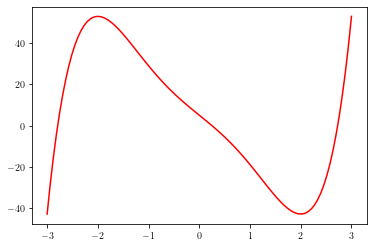

In [2]:
def f(x): # Objective function
    return x**5 - 5*x**3 - 20*x + 5

x = np.linspace(-3, 3, 100)
plt.plot(x, f(x), 'r-')

Text(0.5, 1.0, 'A unimodal quadratic function, showing the minimizer, and the interval of uncertainty')

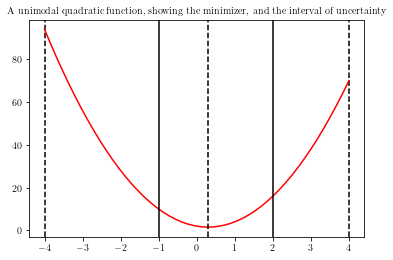

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return 5*x**2 - 3*x + 2
x = np.linspace(-4, 4)
y = f(x)

plt.axvline(x=-4, color='k', linestyle='--')
plt.axvline(x=4, color='k', linestyle='--')
plt.plot(x, y, "-r")
plt.axvline(x=-1, color='k', linestyle='-')
plt.axvline(x=2, color='k', linestyle='-')
plt.axvline(x=0.3, color='k',
linestyle='--')
plt.title("A unimodal quadratic function, showing the minimizer, and the interval of uncertainty", size = 10)

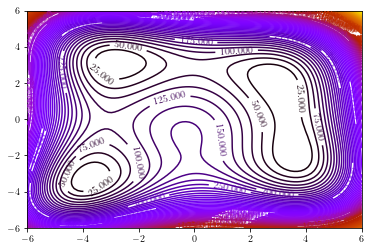

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import autograd.numpy as au
from autograd import grad, jacobian
import scipy

def himm(x): # Objective function
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

grad_himm = grad(himm) # Gradient of the objective function

x = np.linspace(-6, 6, 100)
y = np.linspace(-6, 6, 100)
z = np.zeros(([len(x), len(y)]))
for i in range(0, len(x)):
    for j in range(0, len(y)):
        z[j, i] = himm([x[i], y[j]])

contours=plt.contour(x, y, z, 100, cmap=plt.cm.gnuplot)
plt.clabel(contours, inline=1, fontsize=10)

plt.show()

In [5]:
from scipy.optimize import line_search

start_point = np.array([-2.5, 2.8])
delta = np.array([-2.5, -1])
alpha_1 = 10**-4
alpha_2 = 0.325
beta_max = 0.6

res=line_search(f = himm, myfprime = grad_himm, xk = start_point, pk = delta, c1 = alpha_1, c2 = alpha_2, amax = beta_max)
res

(0.04234665754870197,
 4,
 1,
 6.112599989468139,
 6.5581000000000005,
 array([ 11.13041873, -24.97823686]))

## Introduction to Optimization

+ Let $f(\mathbf{x})$ be a scalar function of a vector of variables $\mathbf{x} = \begin{pmatrix}x_1 \\ x_2 \\ \vdots \\ x_n \end{pmatrix} \in \mathbb{R}^n$. *Numerical Optimization* is the minimization or maximization of this function $f$ subject to constraints on $\mathbf{x}$. This $f$ is a scalar function of $\mathbf{x}$, also known as the *objective function* and the continuous components $x_i \in \mathbf{x}$ are called the *decision variables*.

+ The optimization problem is formulated in the following way:


\begin{align}
&\!\min_{\mathbf{x} \in \mathbb{R}^n}        &\qquad& f(\mathbf{x}) \\
&\text{subject to} &      & g_k(\mathbf{x}) \leq 0,\ k=1,2,..., m\\
&                  &      & h_k(\mathbf{x}) = 0,\ k=1,2,..., r\\
&                  &      & m,r < n. \label{eq:1}\tag{1}
\end{align}

+ Here, $g_k(\mathbf{x})$ and $h_k(\mathbf{x})$ are scalar functions too (like $f(\mathbf{x})$) and are called *constraint functions*. The constraint functions define some specific equations and/or inequalities that $\mathbf{x}$ should satisfy.


## A Solution
  
A *solution* of $f(\mathbf{x})$ is a point $\mathbf{x^*}$ which denotes the optimum vector that solves Eq.\eqref{eq:1}, corresponding to the optimum value $f(\mathbf{x^*})$.

In case of a *minimization* problem, the optimum vector $\mathbf{x^*}$ is referred to as the *global minimizer* of $f$, and $f$ attains the least possible value at $\mathbf{x^*}$. To design an algorithm that finds out the global minimizer for a function is quite difficult, as in most cases we do not have the idea of the overall shape of $f$. Mostly our knowledge is restricted to a local portion of $f$.

+ A point $\mathbf{x^*}$ is called a *global minimizer* of $f$ if $f(\mathbf{x^*}) \leq f(\mathbf{x}) \forall\ x$.

 
+ A point $\mathbf{x^*}$ is called a *local minimizer* of $f$ if there is a neighborhood $\mathcal{N}$ of $\mathbf{x^*}$ such that $f(\mathbf{x^*}) \leq f(\mathbf{x}) \forall\ x \in \mathcal{N}$.


## Maximization
+ We just defined a *minimization* problem as our optimization task. We could do the same with a *maximization* problem with little tweaks. The problem $\underset{\mathbf{x} \in \mathbb{R}^n}{max} f(\mathbf{x})$ can be formulated as:
\begin{equation}
\label{eq:2}\tag{2}
    \underset{\mathbf{x} \in \mathbb{R}^n}{max} f(\mathbf{x}) = - \underset{\mathbf{x} \in \mathbb{R}^n}{min}\{- f(\mathbf{x})\}
\end{equation}

+ We then apply any minimization technique after setting $\hat{f}(\mathbf{x}) = - f(\mathbf{x})$. Further, for the inequality constraints for the maximization problem, given by $g_k(\mathbf{x}) \geq 0$, we set 
\begin{equation}
\label{eq:3}\tag{3}
    \hat{g}_k(\mathbf{x})=-g_k(\mathbf{x})
    (\#eq:3)
\end{equation}

+ The problem thus has become,

\begin{align}
&\!\min_{\mathbf{x} \in \mathbb{R}^n}        &\qquad& \hat{f}(\mathbf{x})\\ 
&\text{subject to} &      & \hat{g}_k(\mathbf{x}) \leq 0,\ k=1,2,..., m\\
&                  &      & h_k(\mathbf{x}) = 0,\ k=1,2,..., r\\
&                  &      & m,r < n.\label{eq:4}\tag{4}
\end{align}

+ After the solution $\mathbf{x^*}$ is computed, the maximum value of the problem is given by: $-\hat{f}(\mathbf{x^*})$.


## Scaling of Decision Variables

While formulating optimization problems, it must be guaranteed that the scale of the decision variables are approximately of the same order. If this is not taken care of, some optimization algorithms that are sensitive to scaling will perform poorly and will flounder to converge to the solution. Two of the fundamental fields that get disturbed due to poor scaling are computing the optimized step lengths and the numerical gradients. One of the widely accepted best practices is to make the decision variables dimensionless and vary them approximately between 0 and 1. One should always prefer optimization algorithms that are not sensitive to scaling.


## Gradient Vector and Hessian Matrix of the Objective Function

+ For a differentiable objective function $f(\mathbf{x}): \mathbb{R}^n \rightarrow \mathbb{R}$, its *gradient vector* given by $\nabla f(\mathbf{x}): \mathbb{R}^n \rightarrow \mathbb{R}^n$, is defined at the point $\mathbf{x}$ in the $n$-dimensional space as the vector of first order partial derivatives:
\begin{equation}
\nabla f(\mathbf{x})= \begin{pmatrix} \frac{\partial f}{\partial x_1}(\mathbf{x})\\
    \vdots \\
    \frac{\partial f}{\partial x_n}(\mathbf{x})
    \end{pmatrix} \label{eq:5}\tag{5}
\end{equation}

+ For a twice continuously differentiable function $f: \mathbb{R}^n \rightarrow \mathbb{R}$, its *Hessian matrix* given by $\mathbf{H}(f(\mathbf{x}))$ is defined at the point $\mathbf{x}$ in the $n \times n$-dimensional space as the matrix of second order partial derivatives:
\begin{equation}
    \mathbf{H} f(\mathbf{x})=\frac{\partial ^2 f}{\partial x_i \partial x_j} = \begin{pmatrix} \frac{\partial^2 f}{\partial x_1^2}(\mathbf{x}) & \frac{\partial^2 f}{\partial x_1 \partial x_2}(\mathbf{x}) & \ldots & \frac{\partial^2 f}{\partial x_1 \partial x_n}(\mathbf{x})\\
    \frac{\partial^2 f}{\partial x_2 \partial x_1}(\mathbf{x}) & \frac{\partial^2 f}{\partial x_2^2}(\mathbf{x}) & \ldots & \frac{\partial^2 f}{\partial x_2 \partial x_n}(\mathbf{x}) \\
    \vdots & \vdots & \ddots & \vdots \\
    \frac{\partial^2 f}{\partial x_n \partial x_1}(\mathbf{x}) & \frac{\partial^2 f}{\partial x_n \partial x_2}(\mathbf{x}) & \ldots & \frac{\partial^2 f}{\partial x_n^2}(\mathbf{x})
    \end{pmatrix}\label{eq:6}\tag{6}
\end{equation}

+ One important relation that we will keep in mind is that the *Hessian matrix* is the *Jacobian* of the *gradient vector* of $f(\mathbf{x})$, where the *Jacobian matrix* of a vector-valued function $\mathbf{F}(\mathbf{x})$ is the matrix of all its first order partial derivatives, given by, $\mathbf{JF}(\mathbf{x})= \begin{pmatrix} \frac{\partial \mathbf{F}}{\partial x_1} & \ldots \frac{\partial \mathbf{F}}{\partial x_n} \end{pmatrix}$. The relation is as followed:
\begin{equation}
    \mathbf{H} f(\mathbf{x}) = \mathbf{J}(\nabla f(\mathbf{x})) \label{eq:7}\tag{7}
\end{equation}

## An Example

Let an objective function be $f(\mathbf{x}) = 2x_1x_2^3+3x_2^2x_3 + x_3^3x_1$. We will find out the gradient vector $\nabla f(\mathbf{x})$ and the Hessian matrix $\mathbf{H} f(\mathbf{x})$ at the point $\mathbf{p} = \begin{pmatrix} 1 & 2 & 3 \end{pmatrix}$. The gradient vector is $\nabla f(\mathbf{x}) = \begin{pmatrix} 2x_2^3+x_3^3 \\ 6x_1x_2^2+6x_2x_3 \\ 3x_2^2+3x_3^2x_1 \end{pmatrix}$. So $\nabla f(\mathbf{x})| \mathbf{p} = \begin{pmatrix} 43 \\ 60 \\ 39 \end{pmatrix}$. The Hessian matrix is therefore given by, $\mathbf{H}f(\mathbf{x}) = \begin{pmatrix} 0 & 6x_2^2 & 3x_3^2 \\ 6x_2^2 & 12x_1x_2+6x_3 & 6x_2 \\ 3x_3^2 & 6x_2 & 6x_3x_1 \end{pmatrix}$ and at point $\mathbf{p}$, $\mathbf{H} f(\mathbf{x})|\mathbf{p} = \begin{pmatrix} 0 & 24 & 27 \\ 24 & 42 & 12 \\ 27 & 12 & 18 \end{pmatrix}$.

We will try to work out the same example with Python scripting now. For that we need an extra package called [`autograd`](https://github.com/HIPS/autograd), besides the [`numpy`](https://numpy.org/) package. The `autograd` package is used for automatically differentiating native Python and Numpy code. Fundamentally `autograd` is used in *gradient-based optimization*. First `pip` install the `autograd package`


In [7]:
pip install autograd

In [8]:
import autograd.numpy as au
from autograd import grad, jacobian 
p = np.array([1, 2, 3], dtype=float)
def f(x): # Objective function
    return 2*x[0]*x[1]**3+3*x[1]**2*x[2]+x[2]**3*x[0]
grad_f = grad(f) # gradient of the objective function
hessian_f = jacobian(grad_f) # Hessian of the objective function
print("gradient vector:",grad_f(p))
print("Hessian matrix:\n",hessian_f(p))

gradient vector: [43. 60. 39.]
Hessian matrix:
 [[ 0. 24. 27.]
 [24. 42. 12.]
 [27. 12. 18.]]


## Directional Derivative of the Objective Function

For a real valued objective function $f(\mathbf{x})$ and a feasible direction $\mathbf{\delta}$, the *directional derivative* of $f(\mathbf{x})$ in the direction $\mathbf{\delta}$ is given by:
\begin{equation}
    \frac{\partial f}{\partial \mathbf{\delta}}(\mathbf{x}) = \lim_{\alpha \to 0} \frac{f(\mathbf{x} + \alpha \mathbf{\delta}) - f(\mathbf{x})}{\alpha} \label{eq:8}\tag{8}
\end{equation}
where $\|\mathbf{\delta}\| = 1$.

Now for $\mathbf{x} \in \mathbb{R}^n$, let us consider the differential equation:
\begin{equation}
    df(\mathbf{x}) = \frac{\partial f(\mathbf{x})}{\partial x_1}dx_1 + \ldots + \frac{\partial f(\mathbf{x})}{\partial x_n}dx_n = \nabla^Tf(\mathbf{x})d\mathbf{x} = \langle \nabla f(\mathbf{x}), d\mathbf{x} \rangle \label{eq:9}\tag{9}
\end{equation}

where $\langle .,. \rangle$ denotes the dot product between two matrices and/or vectors. Now let us consider a function $\hat{f}(\mathbf{x}) = f(\hat{\mathbf{x}} + \alpha \mathbf{\delta})$, such that for a point $\mathbf{x}$ passing through the point $\hat{\mathbf{x}}$ on the line through $\hat{\mathbf{x}}$ in the direction $\mathbf{\delta}$ is given by $\mathbf{x}(\alpha) = \hat{\mathbf{x}} + \alpha \mathbf{\delta}$. now, for an infinitesimal change $d\alpha$, we have $d\mathbf{x}=\mathbf{\delta}d\alpha$. Thus, the differential at the point $\mathbf{x}$ in the given direction is $d\hat{f}=\nabla^Tf(\mathbf{x})\delta d\alpha$ So, the directional derivative now can be written as:
\begin{equation}
    \frac{\partial f}{\partial \mathbf{\delta}}(\mathbf{x}) = \frac{d}{d\alpha}f(\mathbf{x}+\alpha\mathbf{\delta})|_{\alpha=0} = \nabla^Tf(\mathbf{x})\mathbf{\delta} \label{eq:10}\tag{10}
\end{equation}


## An Example

Let an objective function be $f(\mathbf{x}) = 2x_1x_2^3+3x_2^2x_3 + x_3^3x_1$. We will find out the gradient vector $\nabla f(\mathbf{x})$ at the point $\mathbf{p} = \begin{pmatrix} 1 & 2 & 3 \end{pmatrix}$ and then calculate the directional derivative in the direction $\mathbf{\delta}=\begin{pmatrix} \frac{1}{\sqrt{35}} & \frac{3}{\sqrt{35}} & \frac{5}{\sqrt{35}} \end{pmatrix}$. We will use the same `autograd` package to calculate the same using Python.
```


In [9]:
p = np.array([1, 2, 3], dtype=float)
delta = np.array([1, 3, 5], dtype=float)/np.sqrt(35)
def f(x):
    return 2*x[0]*x[1]**3+3*x[1]**2*x[2]+x[2]**3*x[0]
grad_f = grad(f)
print("directional derivative:", grad_f(p).dot(delta))

directional derivative: 70.65489569530399


## Positive Definite and Positive Semi-definite Matrices

+ A real matrix $\mathbf{M}\in \mathbb{R}^{N\times N}$ is a *positive definite* matrix if for any real vector $\mathbf{v} \in \mathbb{R}^n$ other than the null vector, the following is satisfied:
\begin{equation}
    \mathbf{v}^T\mathbf{M}\mathbf{v} > 0 \label{eq:11}\tag{11}
\end{equation}

+ A real matrix $\mathbf{M}\in \mathbb{R}^{N\times N}$ is a *positive semi-definite* matrix if for any real vector $\mathbf{v} \in \mathbb{R}^n$, the following is satisfied:
\begin{equation}
    \mathbf{v}^T\mathbf{M}\mathbf{v} \geq 0 \label{eq:12}\tag{1}
\end{equation}


+ All the eigenvalues of a positive definite matrix are positive.


# An Example

We use a Python script to compute the eigenvalues and check whether the following matrices are positive definite, positive semi-definite or negative-definite:
    
* $\begin{pmatrix}2 & -1 & 0 \\ -1 & 2 & -1\\ 0 & -1 & 2 \end{pmatrix}$
* $\begin{pmatrix} -2 & 4\\ 4 & -8 \end{pmatrix}$
* $\begin{pmatrix} -2 & 2\\ 2 & -4 \end{pmatrix}$

In [10]:
M = np.array(([2, -1, 0], [-1, 2, -1], [0, -1, 2]), dtype=float)
#M = np.array(([-2, 4], [4, -8]), dtype=float)
#M = np.array(([-2, 2], [2, -4]), dtype=float)
eigs = np.linalg.eigvals(M)
print("The eigenvalues of M:", eigs)
if (np.all(eigs>0)):
    print("M is positive definite")
elif (np.all(eigs>=0)):
    print("M is positive semi-definite")
else:
    print("M is negative definite")

The eigenvalues of M: [3.41421356 2.         0.58578644]
M is positive definite


## What is Convexity?

A set $\mathbf{X} \subset \mathbb{R}^n$ is said to be a *convex set* if $\forall\ \mathbf{x}, \mathbf{y} \in \mathbf{X}$ and $\alpha \in [0, 1]$, the following is satisfied:
\begin{equation}
    (1-\alpha)\mathbf{x} + \alpha \mathbf{y} \in \mathbf{X} \label{eq:13}\tag{13}
\end{equation}
If the above condition is not satisfied, the set is a *non-convex set*.

A function $f: \mathbb{R}^n \rightarrow \mathbb{R}$ is called a *convex function* if for every two points $\mathbf{x}, \mathbf{y} \in \mathbb{R}^n$ and $\alpha \in [0,1]$, the following condition is satisfied:
\begin{equation}
f(\alpha \mathbf{x} + (1-\alpha)\mathbf{y}) \leq \alpha f(\mathbf{x})+(1-\alpha)f(\mathbf{y}) \label{eq:14}\tag{14}
\end{equation}

## Numerical Optimization Algorithms

Optimization Algorithms are iterative techniques that follow the following fundamental steps:

* Initialize with a guess of the decision variables $\mathbf{x}$,
* Iterate through the process of generating a list of improving estimates, 
* check whether the terminating conditions are met, and the estimates will be probably stop at the solution point $\mathbf{x}^*$.

The book by Nocedal and Wright [*Nocedal, Jorge, and Stephen Wright. Numerical optimization. Springer Science & Business Media, 2006.*] states that most of the optimization strategies make use of either the objective function $f(\mathbf{x})$, the constraint functions $g(\mathbf{x})$ and $h(\mathbf{x})$, the first or second derivatives of these said functions, information collected during previous iterations and/or local information gathered at the present point. As Nocedal and Wright mentions, a good optimization algorithm should have the following fundamental properties:

* **Robustness**: For all acceptable initial points chosen, the algorithm should operate well on a broad range of problems, in their particular class.
* **Efficiency**: The time complexity and the space complexity of the algorithm should be practicable
* **Accuracy**: The solution should be as precise as possible, with the caveat that it should not be too much delicate to errors in the data or to numerical rounding and/or truncating errors while it is being executed on a machine.

There might be some trade offs allowed between speed and memory, between speed and robustness, etc.